In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris=load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
df= pd.DataFrame(iris.data, columns= iris.feature_names)

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df.shape

(150, 4)

In [8]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [26]:
df[45:55]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Flower_name
45,4.8,3.0,1.4,0.3,2,setosa
46,5.1,3.8,1.6,0.2,2,setosa
47,4.6,3.2,1.4,0.2,2,setosa
48,5.3,3.7,1.5,0.2,2,setosa
49,5.0,3.3,1.4,0.2,2,setosa
50,7.0,3.2,4.7,1.4,2,versicolor
51,6.4,3.2,4.5,1.5,2,versicolor
52,6.9,3.1,4.9,1.5,2,versicolor
53,5.5,2.3,4.0,1.3,2,versicolor
54,6.5,2.8,4.6,1.5,2,versicolor


In [9]:
df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [10]:
df['Flower_name']=df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


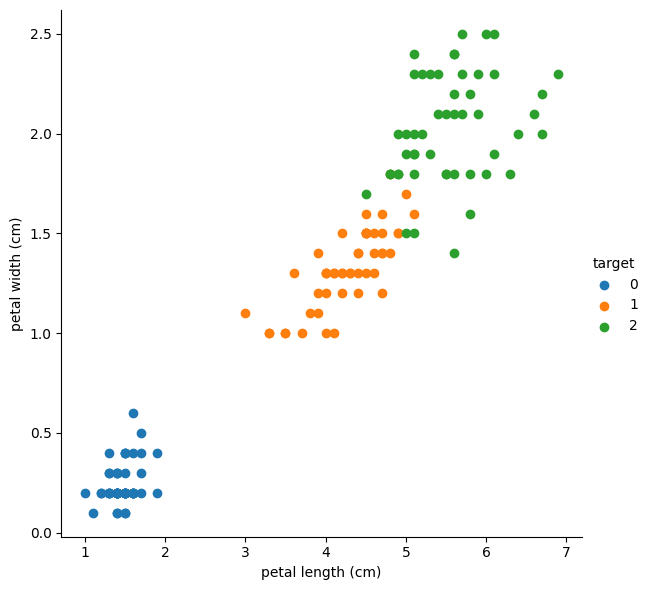

In [11]:
sns.FacetGrid(df,hue='target',height=6).map(plt.scatter,'petal length (cm)','petal width (cm)').add_legend()

From the graph target 0 can be easily predicted because it is separated from the other two classes. But for target 1 and 2, it is difficult to predict or get 100% accuracy because they are overlapping.

Train Test Split

In [12]:
from sklearn.model_selection import train_test_split


In [13]:
X = df.drop(['target','Flower_name'],axis='columns')
y= df.target

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [15]:
len(X_train), len(X_test)


(120, 30)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

*** Using Decision Tree Classifier ***

In [17]:
#dtree = DecisionTreeClassifier()
dtree = DecisionTreeClassifier(criterion='entropy',max_depth=3)
dtree.fit(X_train, y_train)
print(dtree)
train_acc = dtree.score(X_train, y_train)
test_acc = dtree.score(X_test, y_test)

print(f"Training Accuracy: {train_acc:.2%}")
print(f"Testing Accuracy: {test_acc:.2%}")

DecisionTreeClassifier(criterion='entropy', max_depth=3)
Training Accuracy: 98.33%
Testing Accuracy: 96.67%


Excellent Model Performance

Both accuracies are very high (>96%), indicating your model is making correct predictions almost all the time

The 96.67% test accuracy means it correctly classifies about 29 out of 30 test samples

In [18]:
y_pred_dt = dtree.predict(X_test)
# summarize the fit of the model
print("🔍 Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

🔍 Decision Tree
Accuracy: 0.9666666666666667
Confusion Matrix:
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



*** Using Logistic Regression ***

In [19]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr)

train_acc = lr.score(X_train, y_train)
test_acc = lr.score(X_test, y_test)

print(f"Training Accuracy: {train_acc}")
print(f"Testing Accuracy: {test_acc}")

LogisticRegression()
Training Accuracy: 0.9833333333333333
Testing Accuracy: 0.9666666666666667


In [20]:
y_pred_lr = lr.predict(X_test)
# summarize the fit of the model
print("🔍 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

🔍 Logistic Regression
Accuracy: 0.9666666666666667
Confusion Matrix:
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



*** Using KNeighborsClassifier ***

In [21]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
print(knn)

train_acc = knn.score(X_train, y_train)
test_acc = knn.score(X_test, y_test)

print(f"Training Accuracy: {train_acc}")
print(f"Testing Accuracy: {test_acc}")

KNeighborsClassifier(n_neighbors=10)
Training Accuracy: 0.975
Testing Accuracy: 0.9666666666666667


In [22]:
y_pred_knn = knn.predict(X_test)
# summarize the fit of the model
print("🔍 KNeighborsClassifier")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

🔍 KNeighborsClassifier
Accuracy: 0.9666666666666667
Confusion Matrix:
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [27]:
print("Feature importances:")
for name, score in zip(iris.feature_names, dtree.feature_importances_):
    print(f"{name}: {score:.1%}")

Feature importances:
sepal length (cm): 0.0%
sepal width (cm): 0.0%
petal length (cm): 69.9%
petal width (cm): 30.1%


*** Since all 3 models has same result, I decided to go for Decision Tree Classifier because of transparency, easy to understand, speed, and no preprocessing hassle ***

In [23]:
print("\n🌸 Enter flower measurements to predict the species:")
try:
  sepal_length = float(input("Enter sepal length (cm): "))
  sepal_width = float(input("Enter sepal width (cm): "))
  petal_length = float(input("Enter petal length (cm): "))
  petal_width = float(input("Enter petal width (cm): "))

# Prepare input data and scale
  input_df = pd.DataFrame([[sepal_length, sepal_width, petal_length, petal_width]], 
                        columns=iris.feature_names)
  input_data = [[sepal_length, sepal_width, petal_length, petal_width]]

# Predict species
  prediction = dtree.predict(input_data)
  predicted_species = iris.target_names[prediction[0]]

  print(f"\n🌼 Predicted Species: {predicted_species.capitalize()}")

except ValueError:
    print("Error: Please enter numerical values.")


🌸 Enter flower measurements to predict the species:

🌼 Predicted Species: Setosa


In [24]:
import joblib
# Save the model
joblib.dump(dtree, 'decision_tree_model.pkl')

['decision_tree_model.pkl']